shape: (60000, 784)
original 1st row [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 2

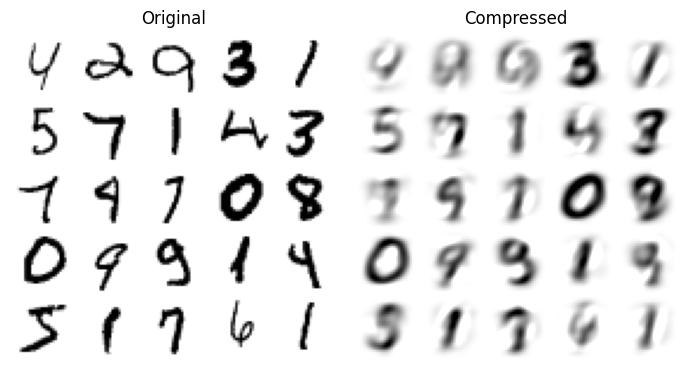

In [83]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


from pathlib import Path

IMAGES_PATH = Path() / "images" / "dim_reduction"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]


print(f'shape: {X_train.shape}')

print(f'original 1st row {X_train[0]}')
value = 10
pca = PCA(n_components=value, svd_solver='full')

X_reduced = pca.fit_transform(X_train)
print(f'Shape: {X_reduced.shape}')
print(f'original 1st row {X_reduced[0]}')


print(f'shape 2: {X_reduced.shape}')

X_recovered = pca.inverse_transform(X_reduced)

print(f'Hydrwated: {X_recovered.shape}')
print(f'hydrated 1st row {X_recovered[0]}')


plt.figure(figsize=(7, 4))
for idx, X in enumerate((X_train[::2100], X_recovered[::2100])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    for row in range(5):
        for col in range(5):
            plt.imshow(X[row * 5 + col].reshape(28, 28), cmap="binary",
                       vmin=0, vmax=255, extent=(row, row + 1, col, col + 1))
            plt.axis([0, 5, 0, 5])
            plt.axis("off")

save_fig(f"mnist_compression_plot_{value}")



## Exercise 1
Train a model using any algorithm we've used in class.  Base line with against the raw MNIST data set.

Plot your models performance as the number of PCA components increases.



shape: (60000, 784)
original 1st row [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 2

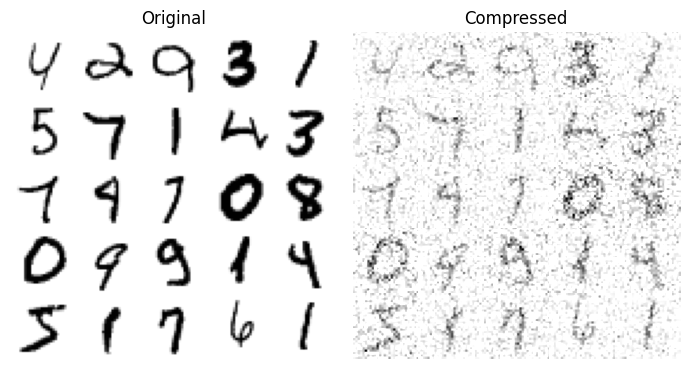

In [82]:
import numpy as np
from sklearn.random_projection import SparseRandomProjection


from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


from pathlib import Path

IMAGES_PATH = Path() / "images" / "dim_reduction"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]


print(f'shape: {X_train.shape}')

print(f'original 1st row {X_train[0]}')
# value = 10
transformer = SparseRandomProjection(eps=.99999999999990, random_state=42,  density = 0.010)#, density = 1 / 3.0)

X_reduced = transformer.fit_transform(X_train)
print(f'Shape: {X_reduced.shape}')
print(f'original 1st row {X_reduced[0]}')


print(f'shape 2: {X_reduced.shape}')

X_recovered = transformer.inverse_transform(X_reduced)

print(f'Hydrwated: {X_recovered.shape}')
print(f'hydrated 1st row {X_recovered[0]}')


plt.figure(figsize=(7, 4))
for idx, X in enumerate((X_train[::2100], X_recovered[::2100])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    for row in range(5):
        for col in range(5):
            plt.imshow(X[row * 5 + col].reshape(28, 28), cmap="binary",
                       vmin=0, vmax=255, extent=(row, row + 1, col, col + 1))
            plt.axis([0, 5, 0, 5])
            plt.axis("off")

save_fig(f"mnist_compression_plot_{value}")




shape: (60000, 784)
original 1st row [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 2

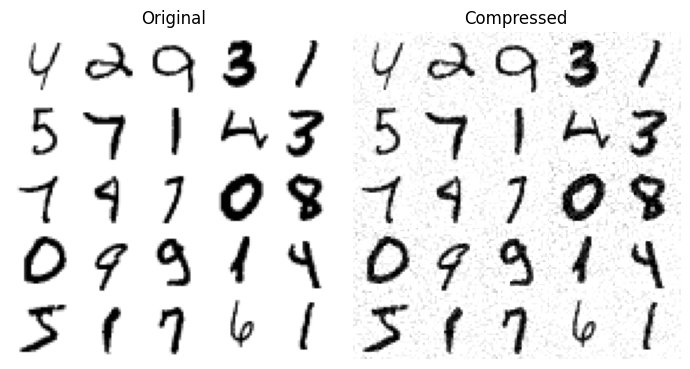

In [87]:
import numpy as np
from sklearn.random_projection import GaussianRandomProjection


from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


from pathlib import Path

IMAGES_PATH = Path() / "images" / "dim_reduction"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]


print(f'shape: {X_train.shape}')

print(f'original 1st row {X_train[0]}')
# value = 10
transformer = GaussianRandomProjection(eps=.4, random_state=42)

X_reduced = transformer.fit_transform(X_train)
print(f'Shape: {X_reduced.shape}')
print(f'original 1st row {X_reduced[0]}')


print(f'shape 2: {X_reduced.shape}')

X_recovered = transformer.inverse_transform(X_reduced)

print(f'Hydrwated: {X_recovered.shape}')
print(f'hydrated 1st row {X_recovered[0]}')


plt.figure(figsize=(7, 4))
for idx, X in enumerate((X_train[::2100], X_recovered[::2100])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    for row in range(5):
        for col in range(5):
            plt.imshow(X[row * 5 + col].reshape(28, 28), cmap="binary",
                       vmin=0, vmax=255, extent=(row, row + 1, col, col + 1))
            plt.axis([0, 5, 0, 5])
            plt.axis("off")

save_fig(f"mnist_compression_plot_{value}")




In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt


from pathlib import Path

IMAGES_PATH = Path() / "images" / "dim_reduction"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")
X_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
X_test, y_test = mnist.data[60_000:], mnist.target[60_000:]


print(f'shape: {X_train.shape}')

print(f'original 1st row {X_train[0]}')
value = 10
pca = KernelPCA(n_components=value, eigen_solver='randomized', kernel='sigmoid')

X_reduced = pca.fit_transform(X_train)
print(f'Shape: {X_reduced.shape}')
print(f'original 1st row {X_reduced[0]}')


print(f'shape 2: {X_reduced.shape}')

X_recovered = pca.inverse_transform(X_reduced)

print(f'Hydrwated: {X_recovered.shape}')
print(f'hydrated 1st row {X_recovered[0]}')


plt.figure(figsize=(7, 4))
for idx, X in enumerate((X_train[::2100], X_recovered[::2100])):
    plt.subplot(1, 2, idx + 1)
    plt.title(["Original", "Compressed"][idx])
    for row in range(5):
        for col in range(5):
            plt.imshow(X[row * 5 + col].reshape(28, 28), cmap="binary",
                       vmin=0, vmax=255, extent=(row, row + 1, col, col + 1))
            plt.axis([0, 5, 0, 5])
            plt.axis("off")

save_fig(f"mnist_compression_plot_{value}")



shape: (60000, 784)
original 1st row [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 2

In [39]:

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



wines_df = pd.read_csv("data/wines.csv", index_col=0)
wines_df.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
0,8.9,0.590,0.50,2.0,0.337,27.0,81.0,0.99640,3.04,1.61,9.5,6,1
1,7.7,0.690,0.22,1.9,0.084,18.0,94.0,0.99610,3.31,0.48,9.5,5,1
2,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5,1
3,11.4,0.460,0.50,2.7,0.122,4.0,17.0,1.00060,3.13,0.70,10.2,5,1
4,8.8,0.240,0.54,2.5,0.083,25.0,57.0,0.99830,3.39,0.54,9.2,5,1


In [40]:
wines_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,7.558400,0.397455,0.30676,4.489250,0.067218,25.29650,91.03100,0.995351,3.251980,0.572990,10.489433,5.796000,0.50000
std,1.559455,0.189923,0.16783,4.112419,0.046931,17.06237,59.57269,0.002850,0.164416,0.169583,1.151195,0.844451,0.50025
min,3.800000,0.080000,0.00000,0.800000,0.009000,1.00000,6.00000,0.987400,2.740000,0.280000,8.500000,3.000000,0.00000
25%,6.500000,0.260000,0.22000,1.800000,0.042000,12.00000,37.75000,0.993480,3.140000,0.460000,9.500000,5.000000,0.00000
50%,7.200000,0.340000,0.30000,2.400000,0.060000,22.00000,86.00000,0.995690,3.240000,0.550000,10.300000,6.000000,0.50000
75%,8.200000,0.520000,0.40000,6.100000,0.080000,35.00000,135.00000,0.997400,3.360000,0.650000,11.300000,6.000000,1.00000
max,15.500000,1.580000,1.00000,26.050000,0.611000,131.00000,313.00000,1.003690,3.900000,2.000000,14.000000,8.000000,1.00000


In [41]:
# copy the original data so that we're free to make changes
wines_df_recode = wines_df.copy()

# use the 'cut' function to reduce a variable down to the aforementioned bins (inclusive boundaries)
wines_df_recode['quality'] = pd.cut(wines_df_recode['quality'],[0,5,7,10], labels=[0,1,2])
wines_df_recode.loc[wines_df_recode['quality'] == 1]

# drop the un-needed columns
x_data = wines_df_recode.drop(['quality'], axis=1)
y_data = wines_df_recode['quality']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=.2, random_state=8, stratify=y_data)

# previews our data to check if we correctly constructed the labels (we did)
print(wines_df['quality'].head())
print(wines_df_recode['quality'].head())

0    6
1    5
2    5
3    5
4    5
Name: quality, dtype: int64
0    1
1    0
2    0
3    0
4    0
Name: quality, dtype: category
Categories (3, int64): [0 < 1 < 2]


In [42]:
y_data.value_counts()


quality
1    598
0    379
2     23
Name: count, dtype: int64

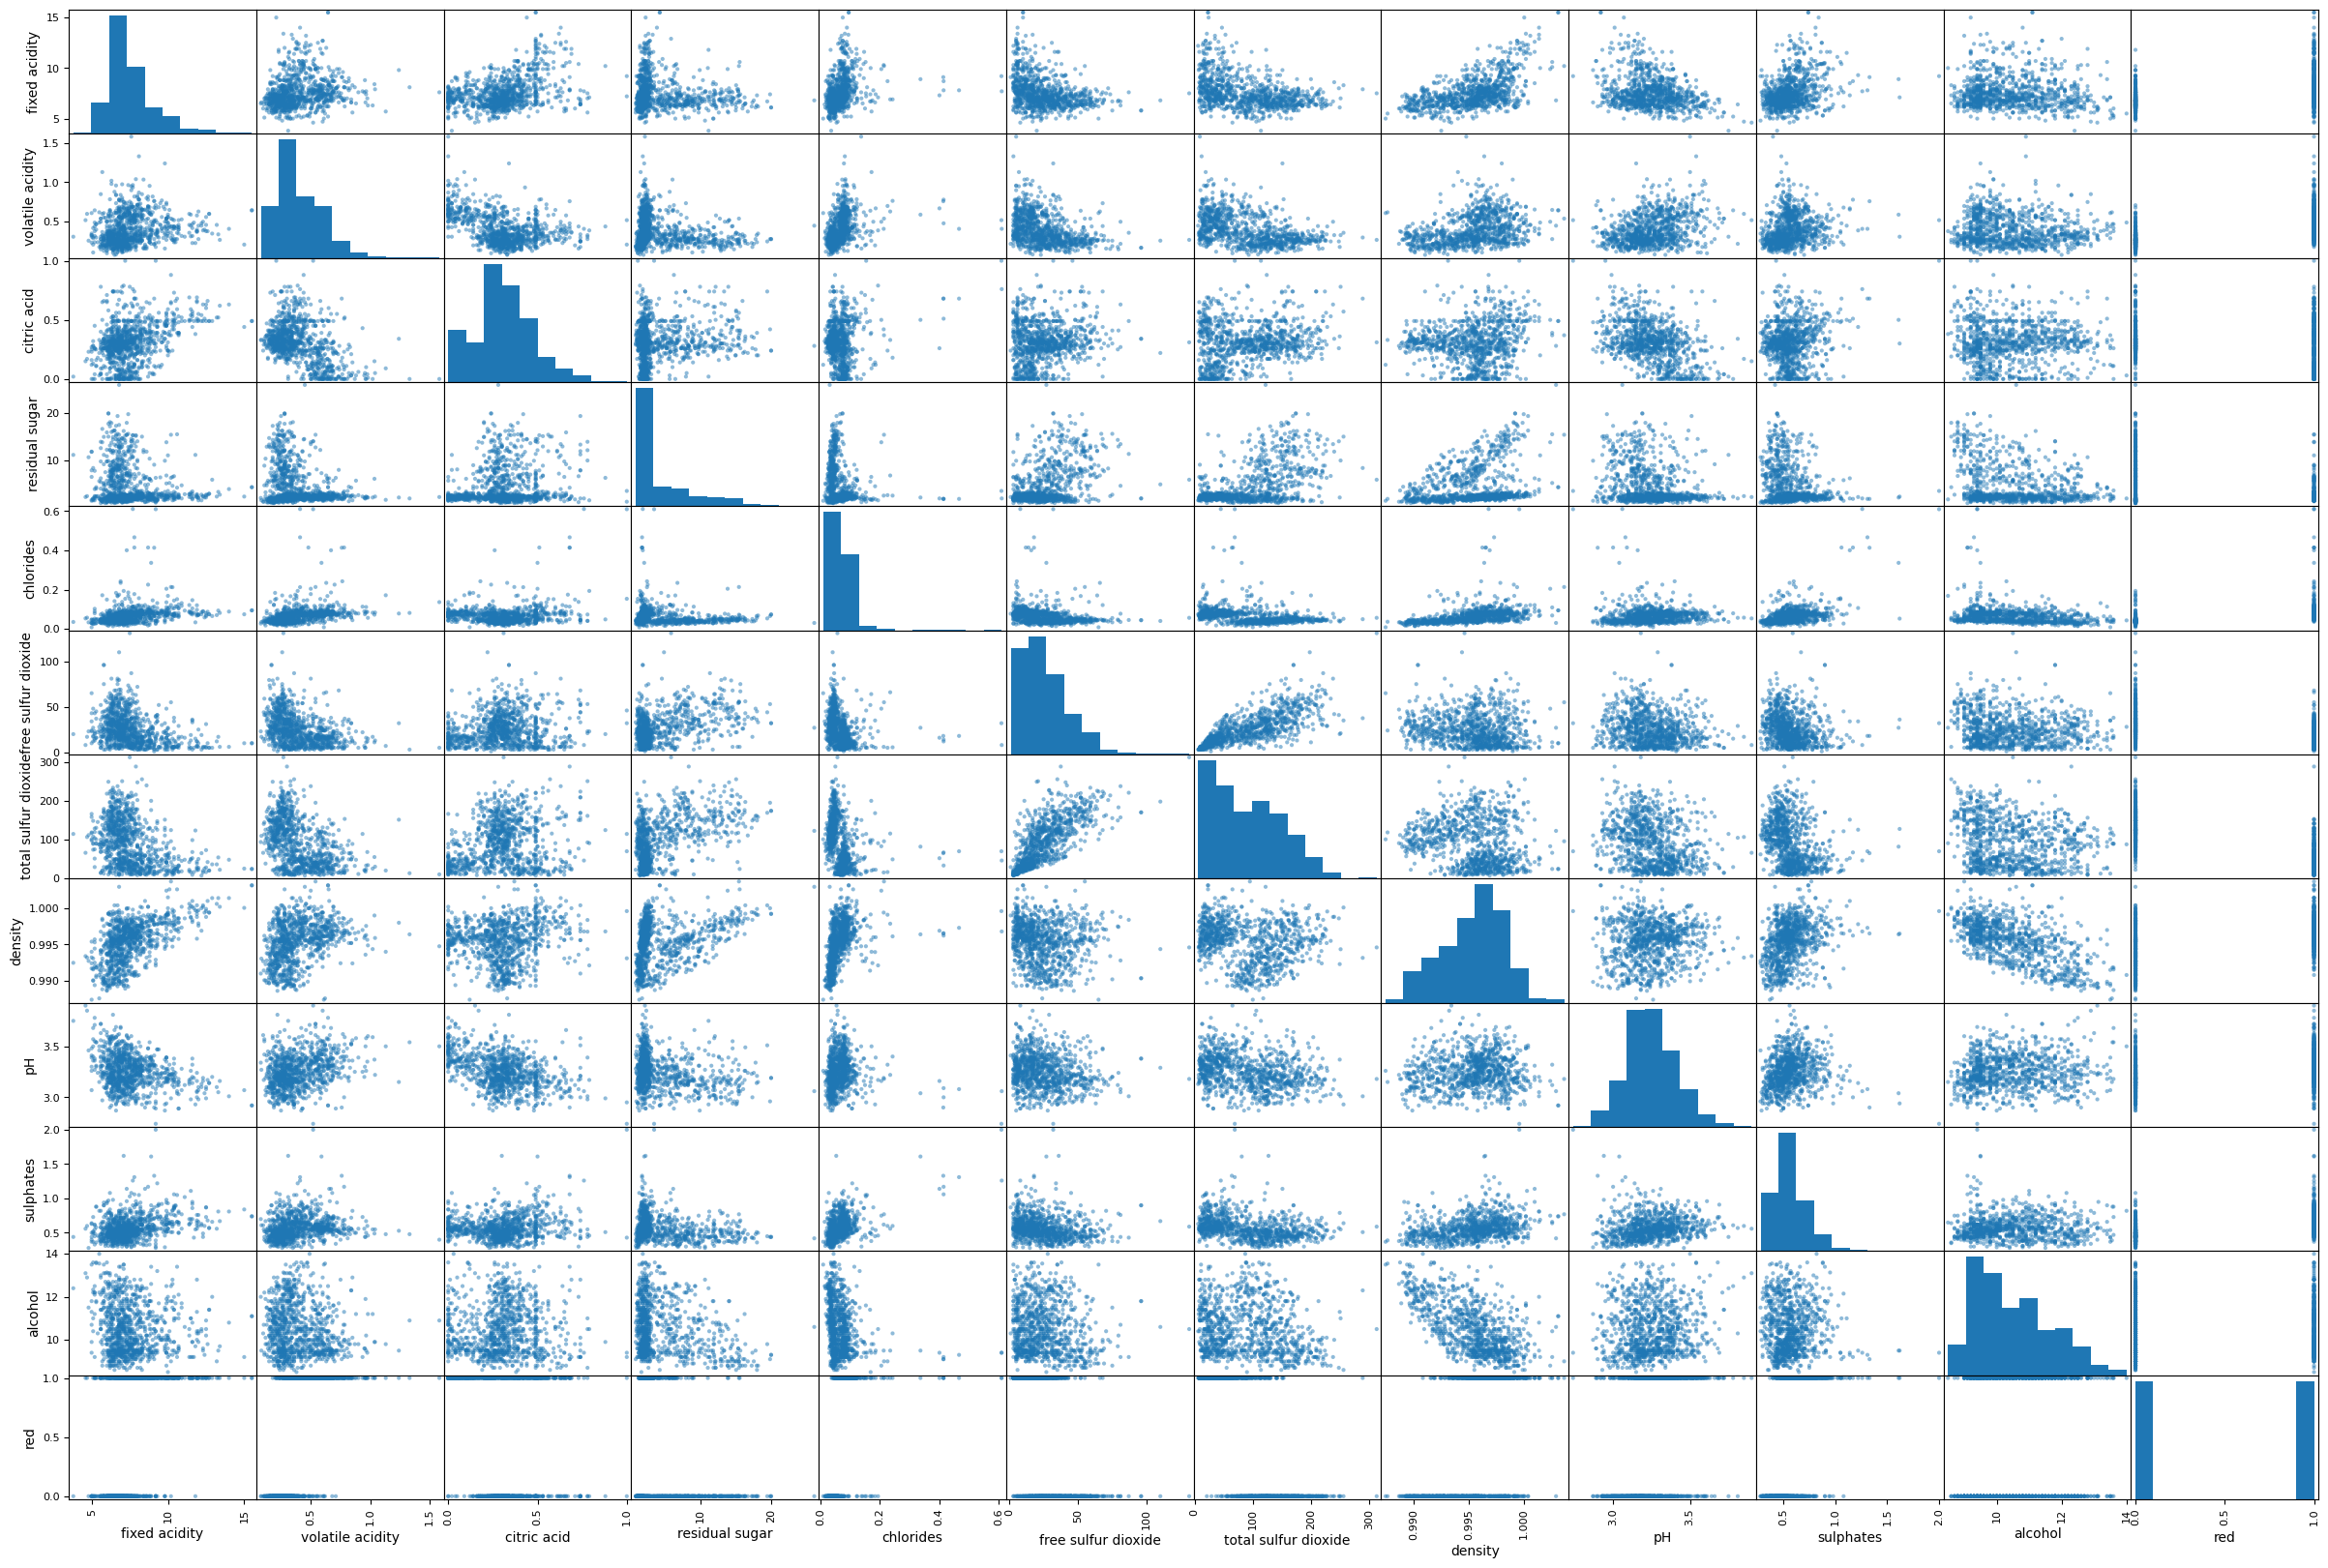

In [43]:
from pandas.plotting import scatter_matrix
scatter_matrix(wines_df_recode, figsize=(30,20));

In [47]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000000, solver='lbfgs', multi_class='ovr', max_iter=10000).fit(x_train,y_train)

train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)

train_f1 = f1_score(y_train, train_pred, average="weighted")
test_f1 = f1_score(y_test, test_pred, average="weighted")

print(f'Training F1: {train_f1}')
print(f'Testing F1: {test_f1}')



Training F1: 0.7286234424804405
Testing F1: 0.7368238951209622


In [49]:
from sklearn.linear_model import LogisticRegressionCV
logit_regr_lasso = LogisticRegressionCV(solver='liblinear', multi_class='ovr', penalty='l1', max_iter=100000, cv=10)
logit_regr_lasso.fit(x_train,y_train) # fit

y_train_pred_lasso = logit_regr_lasso.predict(x_train) # predict the test set
y_test_pred_lasso = logit_regr_lasso.predict(x_test) # predict the test set

train_score_lasso = f1_score(y_train, y_train_pred_lasso, average="weighted") # get train accuracy
test_score_lasso = f1_score(y_test, y_test_pred_lasso, average="weighted") # get test accuracy

print(f'Training F1: {train_score_lasso}')
print(f'Testing F1: {test_score_lasso}')




Training F1: 0.7284685364338332
Testing F1: 0.731570731707317


In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

num_components = 7

# scale the datasets
scale_transformer = StandardScaler(copy=True).fit(x_train)
x_train_scaled = scale_transformer.transform(x_train)
x_test_scaled = scale_transformer.transform(x_test)

# reduce dimensions
pca_transformer = PCA(num_components).fit(x_train_scaled)
x_train_2d = pca_transformer.transform(x_train_scaled)
x_test_2d =  pca_transformer.transform(x_test_scaled)

print(x_train_2d.shape)
x_train_2d[0:5,:]

(800, 7)


array([[-1.23949587, -2.34876616,  1.83010485, -0.54899419,  0.49515612,
        -0.5200047 ,  0.34968204],
       [-1.13615842,  0.37632328, -0.19528833, -1.78725496, -0.70020071,
         0.0952679 ,  2.65819493],
       [ 1.84037474, -0.10597198, -0.86167973,  0.04256576, -0.11747145,
         0.17973446,  1.0037292 ],
       [ 2.00455608, -0.14333293,  2.2946399 , -0.10635103, -0.40595816,
         0.72368314,  1.31333263],
       [ 1.68553308,  4.82627254, -1.82482088,  1.08051892,  0.11243362,
         1.57972386,  1.16140982]])

In [58]:
from sklearn.linear_model import LogisticRegressionCV
logit_regr_lasso = LogisticRegressionCV(solver='liblinear', multi_class='ovr', penalty='l1', max_iter=100000, cv=10)
logit_regr_lasso.fit(x_train_2d,y_train) # fit

y_train_pred_lasso = logit_regr_lasso.predict(x_train_2d) # predict the test set
y_test_pred_lasso = logit_regr_lasso.predict(x_test_2d) # predict the test set

train_score_lasso = f1_score(y_train, y_train_pred_lasso, average="weighted") # get train accuracy
test_score_lasso = f1_score(y_test, y_test_pred_lasso, average="weighted") # get test accuracy

print(f'Training F1: {train_score_lasso}')
print(f'Testing F1: {test_score_lasso}')




Training F1: 0.7059736679194476
Testing F1: 0.7090295358649789
